In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import warnings
warnings.filterwarnings('ignore')
#Sklearn related libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.utils.extmath import density
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, ComplementNB
#Statistic Related libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# @title Dataset upload
df_cred=pd.read_csv('/Users/manishkumar/UoC/607/Project/credit_risk_dataset.csv')

In [5]:
len(df_cred)

32581

In [6]:
# @title Rename of Columns
df_cred.rename(columns={"person_age":"age","person_income":"income","person_home_ownership":"home_ownership",'person_emp_length':'employment_years','cb_person_default_on_file':'historical_default','cb_person_cred_hist_length':'cred_hist_length'}, inplace = True)

In [7]:
#df_cred.drop(columns='loan_percent_income',inplace=True)

In [8]:
df_cred.head()

,age,income,home_ownership,employment_years,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,historical_default,cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:
df_cred.isna().sum()

age                       0
income                    0
home_ownership            0
employment_years        895
loan_intent               0
loan_grade                0
loan_amnt                 0
loan_int_rate          3116
loan_status               0
loan_percent_income       0
historical_default        0
cred_hist_length          0
dtype: int64

In [10]:
df_cred.duplicated().sum()

165

In [11]:
df_cred.drop_duplicates(inplace=True)

In [12]:
df_cred.isna().sum()

age                       0
income                    0
home_ownership            0
employment_years        887
loan_intent               0
loan_grade                0
loan_amnt                 0
loan_int_rate          3095
loan_status               0
loan_percent_income       0
historical_default        0
cred_hist_length          0
dtype: int64

In [13]:
df_cred['loan_status'] = df_cred['loan_status'].astype(object)
df_cred.dtypes

age                      int64
income                   int64
home_ownership          object
employment_years       float64
loan_intent             object
loan_grade              object
loan_amnt                int64
loan_int_rate          float64
loan_status             object
loan_percent_income    float64
historical_default      object
cred_hist_length         int64
dtype: object

In [14]:
# @title Cleaning
import pandas as pd

# Assuming 'df' is your DataFrame
# Calculate the percentage of missing data for each column
missing_percentage = df_cred.isnull().sum() * 100 / len(df_cred)

# Identify columns to drop (more than 10% missing data)
columns_to_drop = missing_percentage[missing_percentage > 10].index

# Drop these columns from the DataFrame
df_cleaned = df_cred.drop(columns=columns_to_drop)

# Display the number of columns before and after
print(f"Original number of columns: {df_cred.shape[1]}")
print(f"Number of columns after removal: {df_cleaned.shape[1]}")

Original number of columns: 12
Number of columns after removal: 12


In [15]:
df_cleaned = df_cleaned[(df_cleaned['age'] - 15) >= df_cleaned['employment_years']]
df_cleaned = df_cleaned[df_cleaned['age'] < 80]
df_cleaned = df_cleaned[(df_cleaned['age'] - 18) >= df_cleaned['cred_hist_length']]
num_columns = df_cleaned.select_dtypes(include=['float64','int64']).columns
cat_columns = df_cleaned.select_dtypes(include=['object']).columns

In [16]:
num_columns

Index(['age', 'income', 'employment_years', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cred_hist_length'],
      dtype='object')

In [17]:
df_cleaned

,age,income,home_ownership,employment_years,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,historical_default,cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [18]:
# # @title Outliers
# for x in num_columns:
#   if x!='age' and x!='income':
#     #df_cleaned = calculate_zscore(df_cleaned, x)
#     Q1 = df_cleaned[x].quantile(0.25)
#     Q3 = df_cleaned[x].quantile(0.75)
#     IQR = Q3 - Q1
#     condition = ~((df_cleaned[x] < (Q1 - 1.5 * IQR)) | (df_cleaned[x] > (Q3 + 1.5 * IQR)))
#     df_cleaned = df_cleaned.loc[condition]

In [19]:
# Calculate the IQR for all numerical columns
Q1 = df_cleaned[num_columns].quantile(0.25)
Q3 = df_cleaned[num_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the condition to filter outliers for all columns simultaneously
condition = ~((df_cleaned[num_columns] < (Q1 - 1.5 * IQR)) | (df_cleaned[num_columns] > (Q3 + 1.5 * IQR)))

# Apply the condition to filter outliers
df_cleaned = df_cleaned[condition.all(axis=1)]


In [20]:
df_cleaned

,age,income,home_ownership,employment_years,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,historical_default,cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32269,37,21600,RENT,4.0,MEDICAL,D,3800,NaN,1,0.18,N,11
32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,D,8000,17.49,1,0.18,N,15
32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,NaN,0,0.03,N,15
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15


In [21]:
df_cleaned.isna().sum()

age                       0
income                    0
home_ownership            0
employment_years          0
loan_intent               0
loan_grade                0
loan_amnt                 0
loan_int_rate          2427
loan_status               0
loan_percent_income       0
historical_default        0
cred_hist_length          0
dtype: int64

In [22]:
# @title Target Variable
df_no_na=df_cleaned.dropna()

cat_columns = cat_columns.drop('loan_status')

num_df=df_cleaned[num_columns]
cat_df=df_cleaned[cat_columns]

Y=df_cleaned['loan_status']
df_cleaned=df_cleaned.drop(columns='loan_status')

Y1=df_no_na['loan_status']
df_no_na=df_no_na.drop(columns='loan_status')




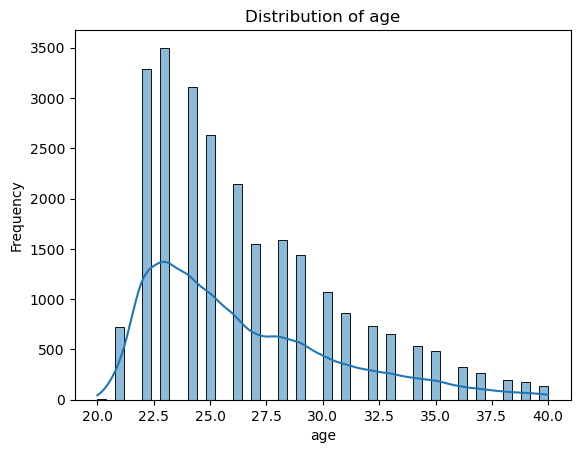

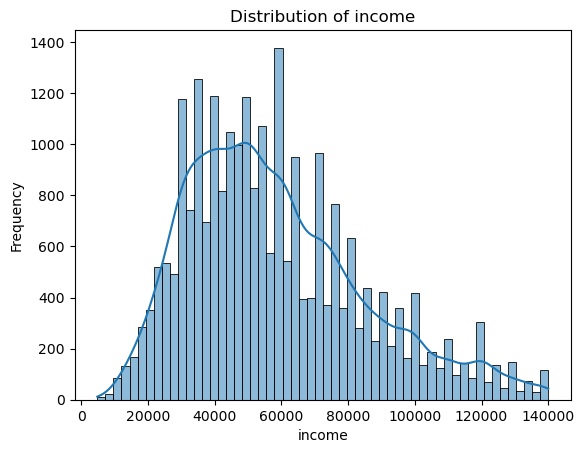

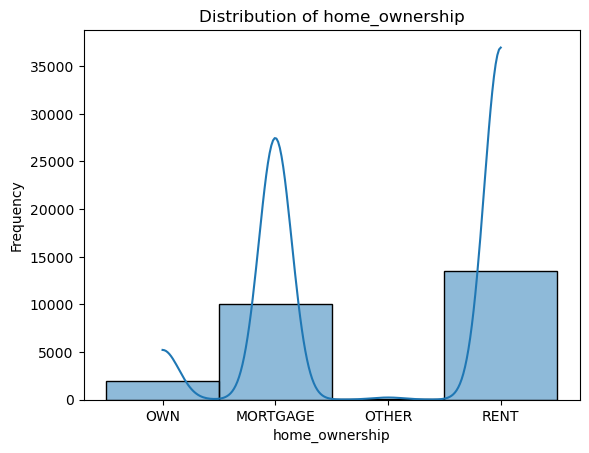

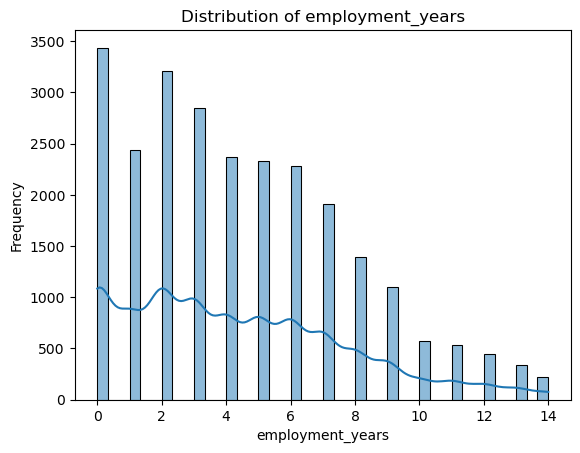

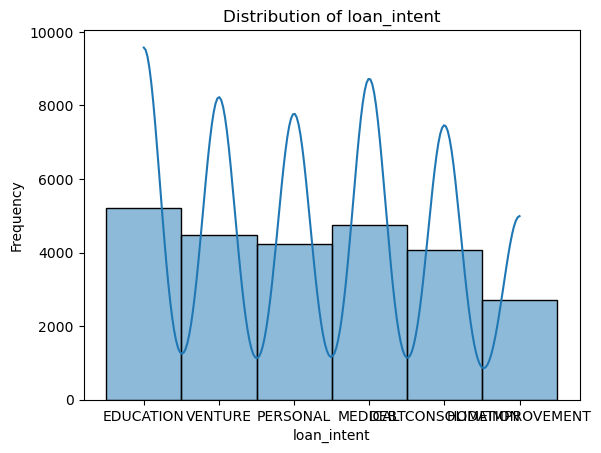

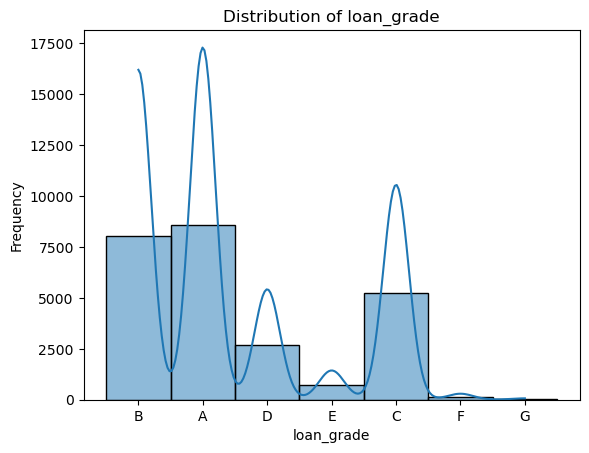

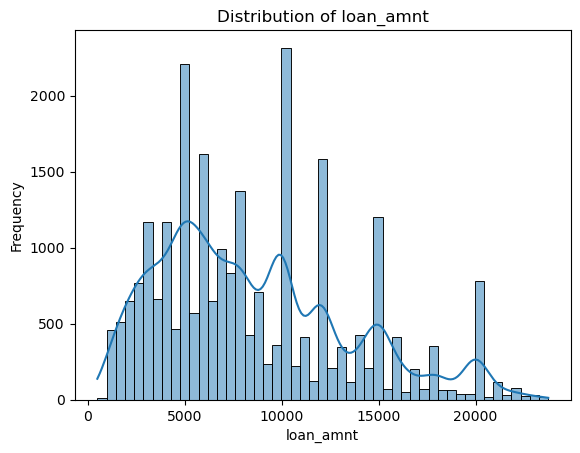

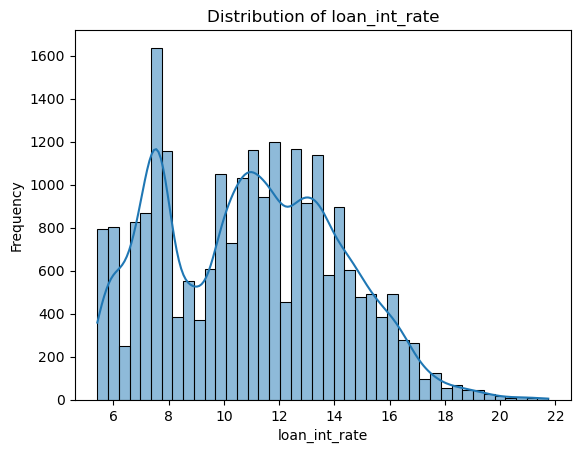

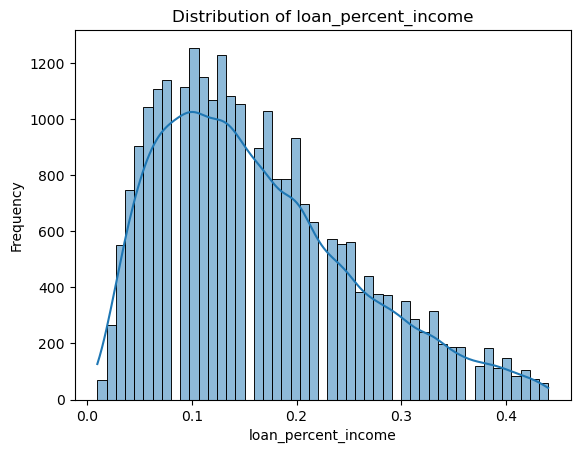

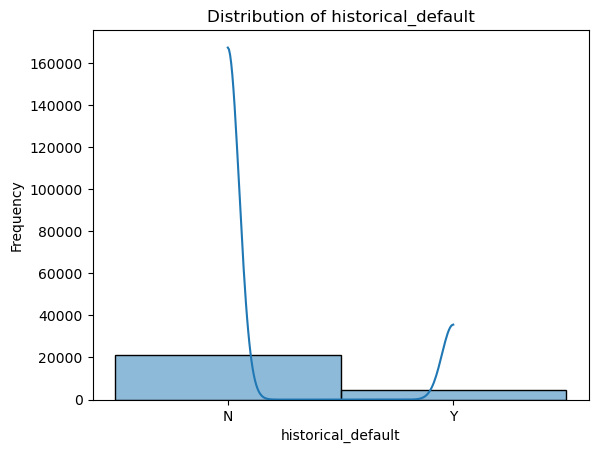

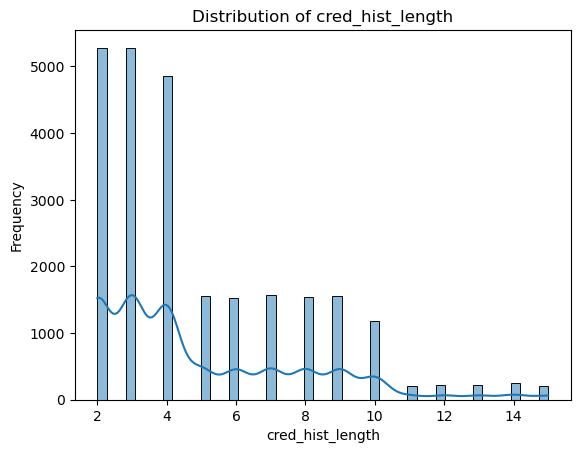

In [23]:
# @title Distribution of Columns
import seaborn as sns
import matplotlib.pyplot as plt
# Check the distribution of each feature
for column in df_cleaned.columns:
    sns.histplot(df_cleaned[column], kde=True) #kernel density estimate (KDE) plot
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()  # This will display the plot


In [24]:
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew
import pandas as pd


# Assuming X_imputed is a pandas DataFrame
# Initialize an empty DataFrame with the same structure as X_imputed for the transformed features
X_quantile_transformed = pd.DataFrame(index=df_cleaned[num_columns].index, columns=num_columns)

# Apply Quantile Transformation conditionally
for column in num_columns:
    if abs(skew(df_cleaned[column].dropna())) > 0.75:  # Check skewness
        transformer = QuantileTransformer(output_distribution='normal', random_state=0)
        # Fit and transform, then assign back to the DataFrame to preserve column names
        X_quantile_transformed[column] = transformer.fit_transform(df_cleaned[[column]])
    else:
        # For columns not transformed, copy the original data
        X_quantile_transformed[column] = df_cleaned[column]

# Now, X_quantile_transformed is a pandas DataFrame with the same structure and column names as X_imputed


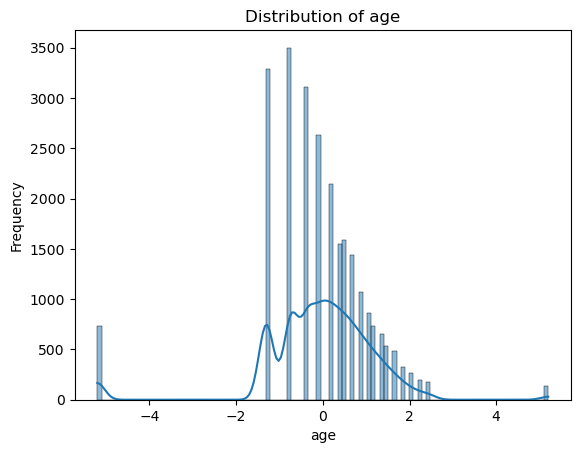

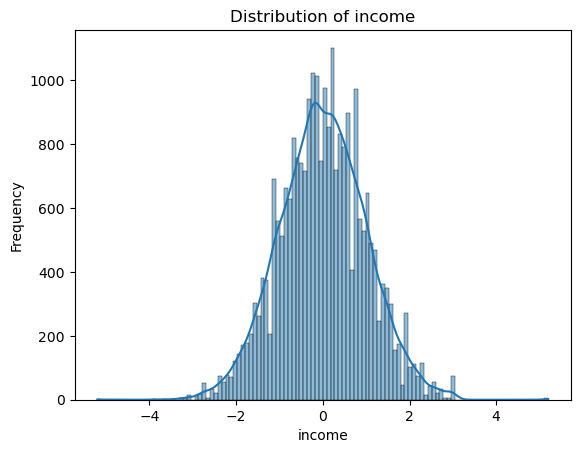

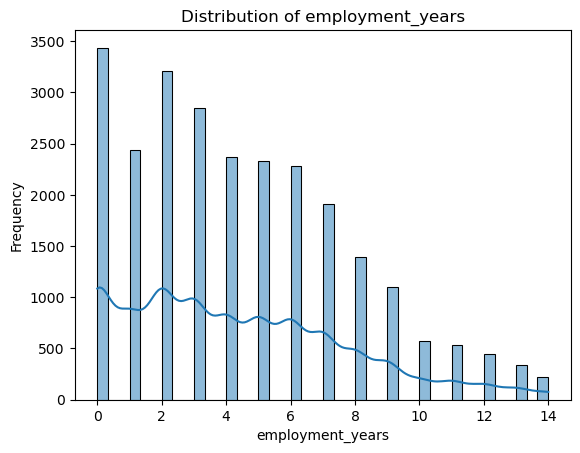

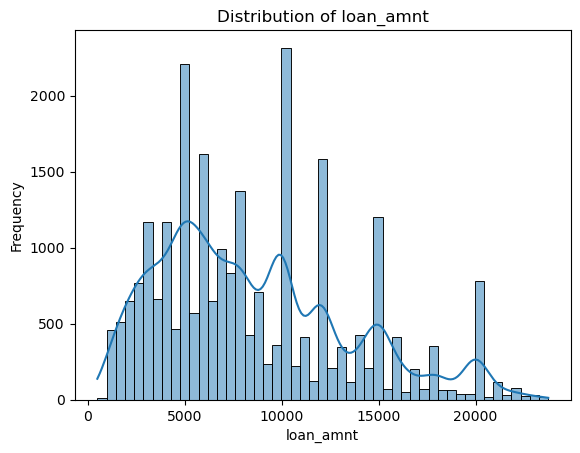

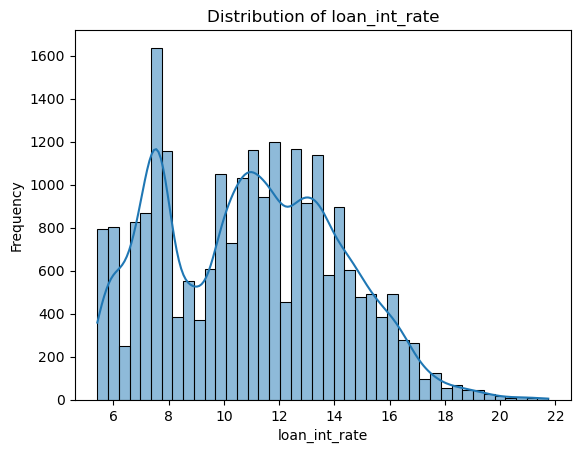

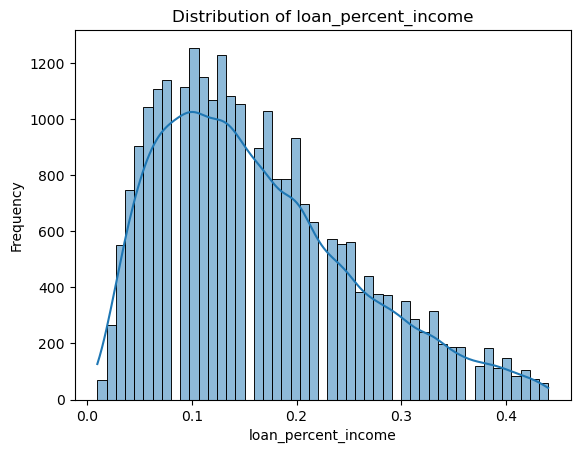

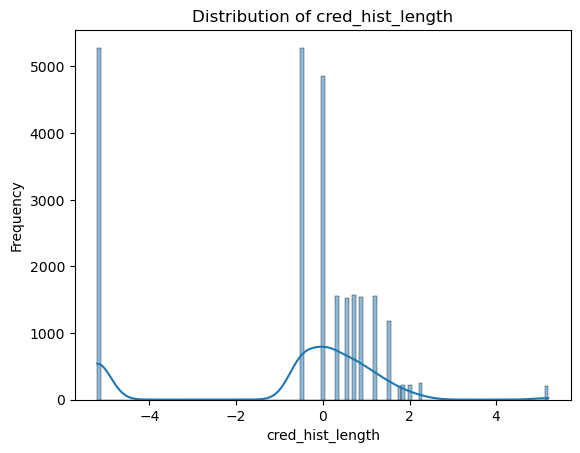

In [25]:
# @title Distribution of Columns
import seaborn as sns
import matplotlib.pyplot as plt
# Check the distribution of each feature
for column in X_quantile_transformed.columns:
    sns.histplot(X_quantile_transformed[column], kde=True) #kernel density estimate (KDE) plot
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()  # This will display the plot


In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled_array=scaler.fit_transform(X_quantile_transformed)
# Convert the scaled array back to a DataFrame
X_scaled = pd.DataFrame(X_scaled_array, columns=X_quantile_transformed.columns, index=X_quantile_transformed.index)
print(X_scaled)

            age    income  employment_years  loan_amnt  loan_int_rate  \
1     -3.951620 -3.098493          0.186756  -1.534094       0.058909   
5     -3.951620 -2.928203         -0.698129  -1.228136      -1.193635   
9     -3.951620 -2.886316          0.481718  -1.411711       1.186198   
19    -0.231472 -2.828282          1.071641  -1.381115       0.011938   
23    -0.231472 -2.816443         -1.288052  -1.432108      -1.146665   
...         ...       ...               ...        ...            ...   
32269  1.569912 -1.746724         -0.108206  -0.962972            NaN   
32287  1.434064 -0.399922         -0.108206  -0.106291       2.047322   
32289  4.029219 -0.963137         -0.698129  -1.534094            NaN   
32290  1.569912  1.095635          1.956526  -0.922178      -1.356466   
32293  1.735809  1.595614          0.186756   1.525484       0.325074   

       loan_percent_income  cred_hist_length  
1                -0.669636         -1.850113  
5                 0.946634   

In [28]:
df_encoded = pd.get_dummies(cat_df, columns=cat_columns)

# Convert True and False to 1 and 0 respectively
df_encoded = df_encoded.astype(np.int64)

# Display the encoded DataFrame
print(df_encoded)

       home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  \
1                            0                     0                   1   
5                            0                     0                   1   
9                            0                     0                   1   
19                           1                     0                   0   
23                           0                     0                   1   
...                        ...                   ...                 ...   
32269                        0                     0                   0   
32287                        0                     0                   0   
32289                        1                     0                   0   
32290                        1                     0                   0   
32293                        1                     0                   0   

       home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
1                        0

In [30]:
merged_df = pd.concat([X_scaled, df_encoded], axis=1)
print(X_scaled.isna().sum())
print(len(merged_df.dropna()))

age                       0
income                    0
employment_years          0
loan_amnt                 0
loan_int_rate          2427
loan_percent_income       0
cred_hist_length          0
dtype: int64
23006


In [31]:
X_scaled.dtypes

age                    float64
income                 float64
employment_years       float64
loan_amnt              float64
loan_int_rate          float64
loan_percent_income    float64
cred_hist_length       float64
dtype: object

In [32]:
# from sklearn.decomposition import PCA
# pca = PCA()
# pca.fit(X_scaled)

In [33]:
# from sklearn.decomposition import PCA
# pca = PCA()
# pca.fit(X_scaled)
# plt.figure(figsize=(10, 7))
# plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
# plt.title('Explained Variance by Components')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.grid(True)
# plt.show()

In [34]:
# import numpy as np
# import pandas as pd

# from sklearn.preprocessing import StandardScaler

# # Assumptions for demonstration
# # X_scaled: initially a DataFrame scaled version of your data
# # scaler: an instance of StandardScaler fitted on the original data

# k = 6  # The number of components chosen based on the explained variance
# pca_k = PCA(n_components=k)

# max_iter = 10
# tolerance = 1e-2

# # Ensure previous_approx starts as a DataFrame with the same columns as X_scaled
# previous_approx = X_scaled.copy()
# count=0
# for iteration in range(max_iter):
#     # Apply PCA
#     X_pca_k = pca_k.fit_transform(previous_approx)
#     X_approx = pca_k.inverse_transform(X_pca_k)

#     # Convert X_approx back to a DataFrame with the same column names as X_scaled
#     X_approx_df = pd.DataFrame(X_approx, columns=X_scaled.columns)

#     # Check for convergence using the Frobenius norm on the DataFrame directly
#     delta = np.linalg.norm(X_approx_df.values - previous_approx.values, 'fro')
#     if delta < tolerance:
#         print(f"Convergence reached after {iteration} iterations.")
#         break

#     # Find missing values based on the original DataFrame structure
#     # Note: Assuming X_imputed is defined correctly to indicate missing values in the scaled data
#     missing_values = pd.isna(X_scaled)
#     print(missing_values)

#     # Update missing values in the scaled space
#     # Here, no need to use scaler.inverse_transform since we maintain DataFrame structure
#     previous_approx[missing_values] = X_approx_df[missing_values]

# # Inverse transform to get back to the original data space, if needed
# # Ensure to convert previous_approx back to a NumPy array or similar if your scaler expects it

# X_imputed_final = scaler.inverse_transform(previous_approx.values)

# column_names = X_scaled.columns
# print(count)
# # Converting the numpy array 'X_imputed_final' back to a pandas DataFrame
# X_imputed_final_df = pd.DataFrame(X_imputed_final, columns=column_names)

In [35]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming X_scaled is a DataFrame that has been previously defined and contains 'loan_int_rate' among other features

# Splitting the DataFrame into parts with and without missing 'loan_int_rate' values
X_test = X_scaled[X_scaled['loan_int_rate'].isna()]
X_train = X_scaled[X_scaled['loan_int_rate'].notna()]

# Extracting the 'loan_int_rate' column from X_test for later comparison
original_loan_int_rate = X_test['loan_int_rate']
mean_loan_int_rate = X_scaled['loan_int_rate'].mean()
# Define the range of n_neighbors values to try
neighbors_range = range(1, 21)  # Adjust the range as needed

# Initialize dictionaries to store MSE scores for training and testing sets
train_mse_scores = {}
test_mse_scores = {}

# Iterate over the range of n_neighbors values
for n_neighbors in neighbors_range:
    # Initialize the KNNImputer with the current n_neighbors value
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)

    # Impute missing values using KNNImputer on the training set
    X_train_imputed = knn_imputer.fit_transform(X_train)

    # Impute missing values on the testing set (using the imputer fitted on the training set)
    X_test_imputed = knn_imputer.transform(X_test)

    # Check for NaN values in the imputed 'loan_int_rate' column
    if np.isnan(X_test_imputed).any():
        print(f"NaN values found after imputation for n_neighbors = {n_neighbors}")

    # Calculate mean squared error for the training set
    # Note: Direct comparison of entire DataFrames may not be meaningful here; typically, you'd evaluate a specific prediction task.
    # For illustrative purposes, this is kept.
    train_mse = mean_squared_error(X_train.values.ravel(), X_train_imputed.ravel())
    train_mse_scores[n_neighbors] = train_mse

    # Update to calculate MSE for a specific column after re-constructing the DataFrame for imputed test set
    X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)
    test_mse = mean_squared_error(original_loan_int_rate.fillna(mean_loan_int_rate), X_test_imputed_df['loan_int_rate'])
    test_mse_scores[n_neighbors] = test_mse

# Find the optimal n_neighbors value with the lowest mean squared error on the testing set
optimal_n_neighbors = min(test_mse_scores, key=test_mse_scores.get)
optimal_test_mse = test_mse_scores[optimal_n_neighbors]

print("Optimal n_neighbors:", optimal_n_neighbors)
print("Mean Squared Error on Testing Set with optimal n_neighbors:", optimal_test_mse)


Optimal n_neighbors: 20
Mean Squared Error on Testing Set with optimal n_neighbors: 0.08837061696264881


In [36]:
# Concatenate the imputed test set and the train set back together
combined_df = pd.concat([X_train, X_test_imputed_df], axis=0).sort_index()

print(combined_df.isna().sum())

age                    0
income                 0
employment_years       0
loan_amnt              0
loan_int_rate          0
loan_percent_income    0
cred_hist_length       0
dtype: int64


In [37]:
# Concatenate the imputed test set and the train set back together
total_orig_df = pd.concat([X_scaled, df_encoded],axis=1)
total_cleaned_df=total_orig_df.dropna()

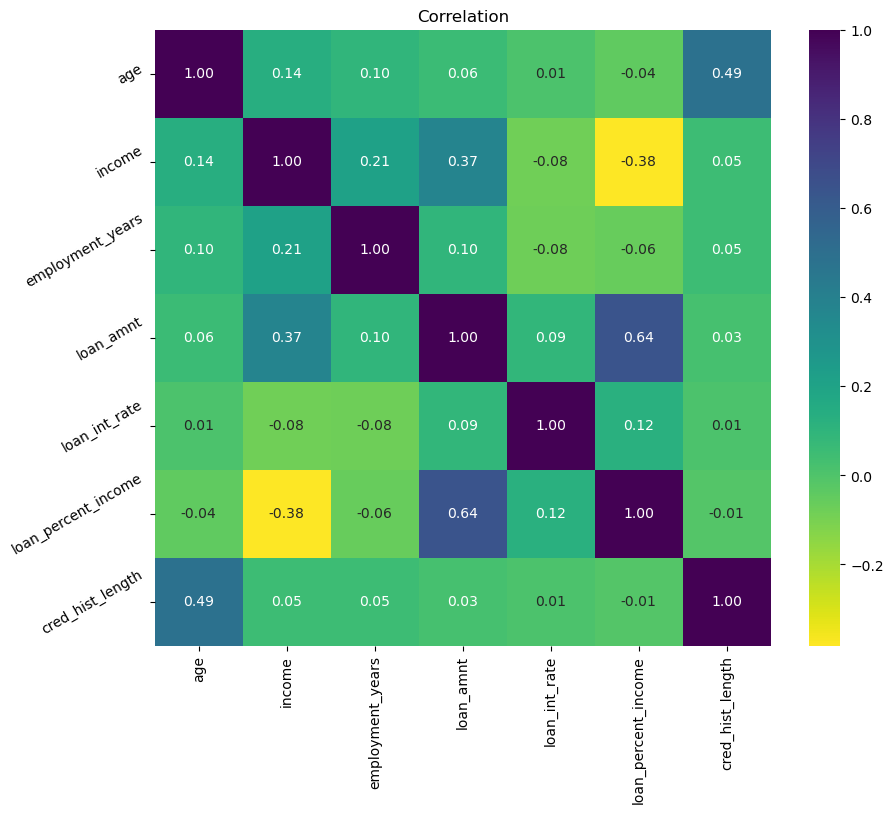

,features,VIF
0,age,1.333817
1,income,4.895131
2,employment_years,1.055566
3,loan_amnt,6.961681
4,loan_int_rate,1.030938
5,loan_percent_income,6.963196
6,cred_hist_length,1.308319


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

features_corr=combined_df[num_columns].corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation')
a = sns.heatmap(features_corr, square=True, annot=True, fmt='.2f',linecolor='white', cmap='viridis_r')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()


VIF_dataframe=pd.DataFrame()
VIF_dataframe['features']=num_columns
VIF_dataframe['VIF']=[VIF(combined_df[num_columns],i) for i in range(num_columns.shape[0])]
VIF_dataframe

In [39]:
total_new_df=pd.concat([combined_df, df_encoded],axis=1)
total_new_df.isna().sum()

age                              0
income                           0
employment_years                 0
loan_amnt                        0
loan_int_rate                    0
loan_percent_income              0
cred_hist_length                 0
home_ownership_MORTGAGE          0
home_ownership_OTHER             0
home_ownership_OWN               0
home_ownership_RENT              0
loan_intent_DEBTCONSOLIDATION    0
loan_intent_EDUCATION            0
loan_intent_HOMEIMPROVEMENT      0
loan_intent_MEDICAL              0
loan_intent_PERSONAL             0
loan_intent_VENTURE              0
loan_grade_A                     0
loan_grade_B                     0
loan_grade_C                     0
loan_grade_D                     0
loan_grade_E                     0
loan_grade_F                     0
loan_grade_G                     0
historical_default_N             0
historical_default_Y             0
dtype: int64

In [35]:
# print(total_cleaned_df)
# print(Y1)
Y1 = Y1.astype(np.int64)
Y = Y.astype(np.int64)

In [41]:
# @title Logistic Regression before imputation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(total_cleaned_df, Y1, test_size=0.2, random_state=45)

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'saga'],  # Solver algorithm
    'max_iter': [100, 500, 1000]  # Maximum number of iterations
}

# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

# Print the results
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print(f"Accuracy on test data: {accuracy*100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manishkumar/anaconda3/lib/py

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manishkumar/anaconda3/lib/py

Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.867094214710086
Accuracy on test data: 87.24%
Precision: 0.7518
Recall: 0.5606
F1 Score: 0.6423
Mean Absolute Error (MAE): 0.1276
Mean Squared Error (MSE): 0.1276


In [42]:
# @title Logistic Regression after imputation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(total_new_df, Y, test_size=0.2, random_state=45)

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],  # Inverse of regularization strength
    'max_iter': [100, 500, 1000]  # Maximum number of iterations
}

# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

# Print the results
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print(f"Accuracy on test data: {accuracy*100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Best Parameters: {'C': 1000, 'max_iter': 100}
Best Score: 0.8682293097628561
Accuracy on test data: 86.44%
Precision: 0.7567
Recall: 0.5252
F1 Score: 0.6200
Mean Absolute Error (MAE): 0.1356
Mean Squared Error (MSE): 0.1356


In [43]:
# @title commented random forest classifier
# Define the model
# model = RandomForestClassifier(random_state=42)

# # Define the parameters grid to search
# param_grid = {
#     'n_estimators': [10,20,50, 100, 200],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
#     # You can add more parameters here to tune
# }

# # Setup the grid search
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# # Perform the grid search on the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the best score
# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Score: {grid_search.best_score_:.4f}")

# # Use the best estimator to make predictions on the test set
# best_model = grid_search.best_estimator_
# predictions = best_model.predict(X_test)

# # Evaluate the best model on the test set
# accuracy = accuracy_score(y_test, predictions)
# print(f"Test Set Accuracy: {accuracy * 100:.2f}%")


In [44]:
# @title Commented Random Forest Classifier For Imputed
# # Define the model
# model = RandomForestClassifier(random_state=42)

# # Define the parameters grid to search
# param_grid = {
#     'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
#     # You can add more parameters here to tune
# }

# # Setup the grid search
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# # Perform the grid search on the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the best score
# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Score: {grid_search.best_score_:.4f}")

# # Use the best estimator to make predictions on the test set
# best_model = grid_search.best_estimator_
# predictions = best_model.predict(X_test)

# # Evaluate the best model on the test set
# accuracy = accuracy_score(y_test, predictions)
# print(f"Test Set Accuracy: {accuracy * 100:.2f}%")

In [45]:
# @title Lasso Classifier before Imputation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error

# Assuming total_cleaned_df is your features dataframe and Y1 is your target series
X_train, X_test, y_train, y_test = train_test_split(total_cleaned_df, Y1, test_size=0.2, random_state=45)

# Initialize the logistic regression model with L1 penalty for Lasso
logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=100)

# Fit the model on your training data
logreg_lasso.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = logreg_lasso.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Accuracy on test data: {accuracy*100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


Accuracy on test data: 87.27%
Precision: 0.7529
Recall: 0.5606
F1 Score: 0.6427
Mean Absolute Error (MAE): 0.1273
Mean Squared Error (MSE): 0.1273


In [53]:
# @title KNN Classifier Before Imputation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(total_cleaned_df, Y1, test_size=0.2, random_state=42)

# Initialize the KNN classifier
# Start with a simple choice, e.g., 5 neighbors. Adjust based on performance.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)
X_test = np.ascontiguousarray(X_test)
# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 89.29%
Precision: 0.8257
Recall: 0.5985
F1 Score: 0.6940


In [56]:
# @title KNN Classifier Optimization
X_train, X_test, y_train, y_test = train_test_split(total_cleaned_df, Y1, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 31),  # Testing 1 to 30 neighbors
    'weights': ['uniform', 'distance'],  # Weight types
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

knn = KNeighborsClassifier()

grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.3f}")

# Predict and evaluate on the test set
best_knn = grid.best_estimator_
X_test = np.ascontiguousarray(X_test)
y_pred = best_knn.predict(X_test)

print(f"Test set accuracy: {accuracy_score(y_test, y_pred):.3f}")


/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/manishkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ma

Best parameters: {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}
Best cross-validation score: 0.900
Test set accuracy: 0.904


In [226]:
# @title SVM Classifier Optimization
from sklearn.svm import SVC
param_grid = {
'C': [0.1, 1, 10, 100],
'gamma': [0.01, 0.1, 1, 10],
'kernel': ['linear', 'rbf']
}

X_train, X_test, y_train, y_test = train_test_split(total_cleaned_df, Y1, test_size=0.2, random_state=42)

grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
display(grid_search.best_params_)
#Train the SVC model
svc_model = grid_search.best_estimator_
svc_model.fit(X_train, y_train)
#Evaluate the model
y_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Final Accuracy {:.2f}%".format(accuracy*100))
print("Final Precision: {:.2f}%".format(precision * 100))

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Final Accuracy 91.79%
Final Precision: 91.00%


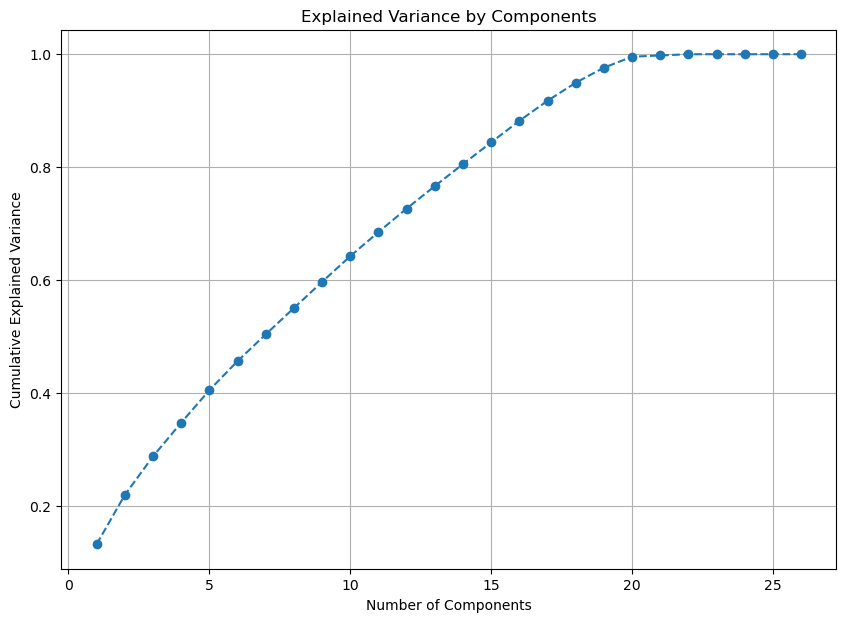

In [29]:
# @title SVM Classifier PCA optimization
from sklearn.decomposition import PCA
df_pca=pd.concat([X_quantile_transformed, df_encoded],axis=1)
df_pca.dropna(inplace=True)
scaler = StandardScaler()
df_pca = scaler.fit_transform(df_pca)

pca = PCA()
pca.fit(df_pca)
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [36]:

X_train, X_test, y_train_pca, y_test_pca = train_test_split(df_pca, Y1, test_size=0.2, random_state=42)
#Standardize the transformed data
print(X_train)
print(y_train_pca)
#Apply PCA
num_components = 20
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
#Finding best Hyper-parameter
param_grid = {
'C': [0.1, 1, 10, 100],
'gamma': [0.01, 0.1, 1, 10],
'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train_pca)
display(grid_search.best_params_)
#Train the SVC model
svc_model = grid_search.best_estimator_
svc_model.fit(X_train_pca, y_train_pca)
# Evaluate the model
y_pred = svc_model.predict(X_test_pca)
accuracy = accuracy_score(y_test_pca, y_pred)
print("Final Accuracy {:.2f}%".format(accuracy*100))

[[ 0.82963239  1.37483577  0.48377614 ... -0.03427807  0.46187945
  -0.46187945]
 [-0.00832985 -2.22297247 -1.28786644 ... -0.03427807  0.46187945
  -0.46187945]
 [ 1.05718425 -0.09531756  2.25541872 ... -0.03427807  0.46187945
  -0.46187945]
 ...
 [-3.95273045 -0.10886591 -0.10677138 ... -0.03427807  0.46187945
  -0.46187945]
 [-0.23236859 -0.34451699  0.18850238 ... -0.03427807 -2.16506708
   2.16506708]
 [ 0.7140265   1.44272351 -0.40204515 ... -0.03427807  0.46187945
  -0.46187945]]
18452    0
341      1
21992    0
8521     0
9875     0
        ..
14915    0
28474    0
6961     0
1500     0
20568    0
Name: loan_status, Length: 18404, dtype: int64


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Final Accuracy 92.03%


In [68]:
# @title Naive Bayes Classifier with PCA
# Train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train_pca)
# Make predictions
y_pred = nb_model.predict(X_test_pca)
# Evaluate the model
accuracy = accuracy_score(y_test_pca, y_pred)
print("Final Accuracy {:.2f}%".format(accuracy*100))

Final Accuracy 81.77%


In [71]:
# @title Complement Naive Bayes Classifier with MinMaxScalar
from sklearn.preprocessing import MinMaxScaler #fixed import
#Apply PCA
scaler = MinMaxScaler()
X_train_stan = scaler.fit_transform(X_train_pca)
X_test_stan = scaler.transform(X_test_pca)
# Create and train the ComplementNB model
complement_nb_model = ComplementNB()
complement_nb_model.fit(X_train_stan, y_train_pca)
# Make predictions
y_pred = complement_nb_model.predict(X_test_stan)
# Evaluate the model
accuracy = accuracy_score(y_test_pca, y_pred)
print("Final Accuracy {:.2f}%".format(accuracy*100))

Final Accuracy 67.69%


In [72]:
# @title Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=100)
dt_params={
'criterion':("gini", "entropy", "log_loss"),
'max_features':("sqrt", "log2",None),
'min_samples_split':[2,4,6,8],
'min_samples_leaf':[1,3,5,7,9],
'max_depth':[5,6,7,8,9]
}
dt_search=GridSearchCV(estimator=dt_model,param_grid=dt_params)
df_dt=df_cleaned[num_columns]
df_dt_complete=pd.concat([df_dt, df_encoded],axis=1)
df_dt_complete.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_dt_complete, Y1, test_size=0.2, random_state=42)

best_dt_model=dt_search.fit(X_train,y_train)
print("The best hyperparameters for DecisionTreeClassifier is:\n",best_dt_model.best_params_)

The best hyperparameters for DecisionTreeClassifier is:
 {'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


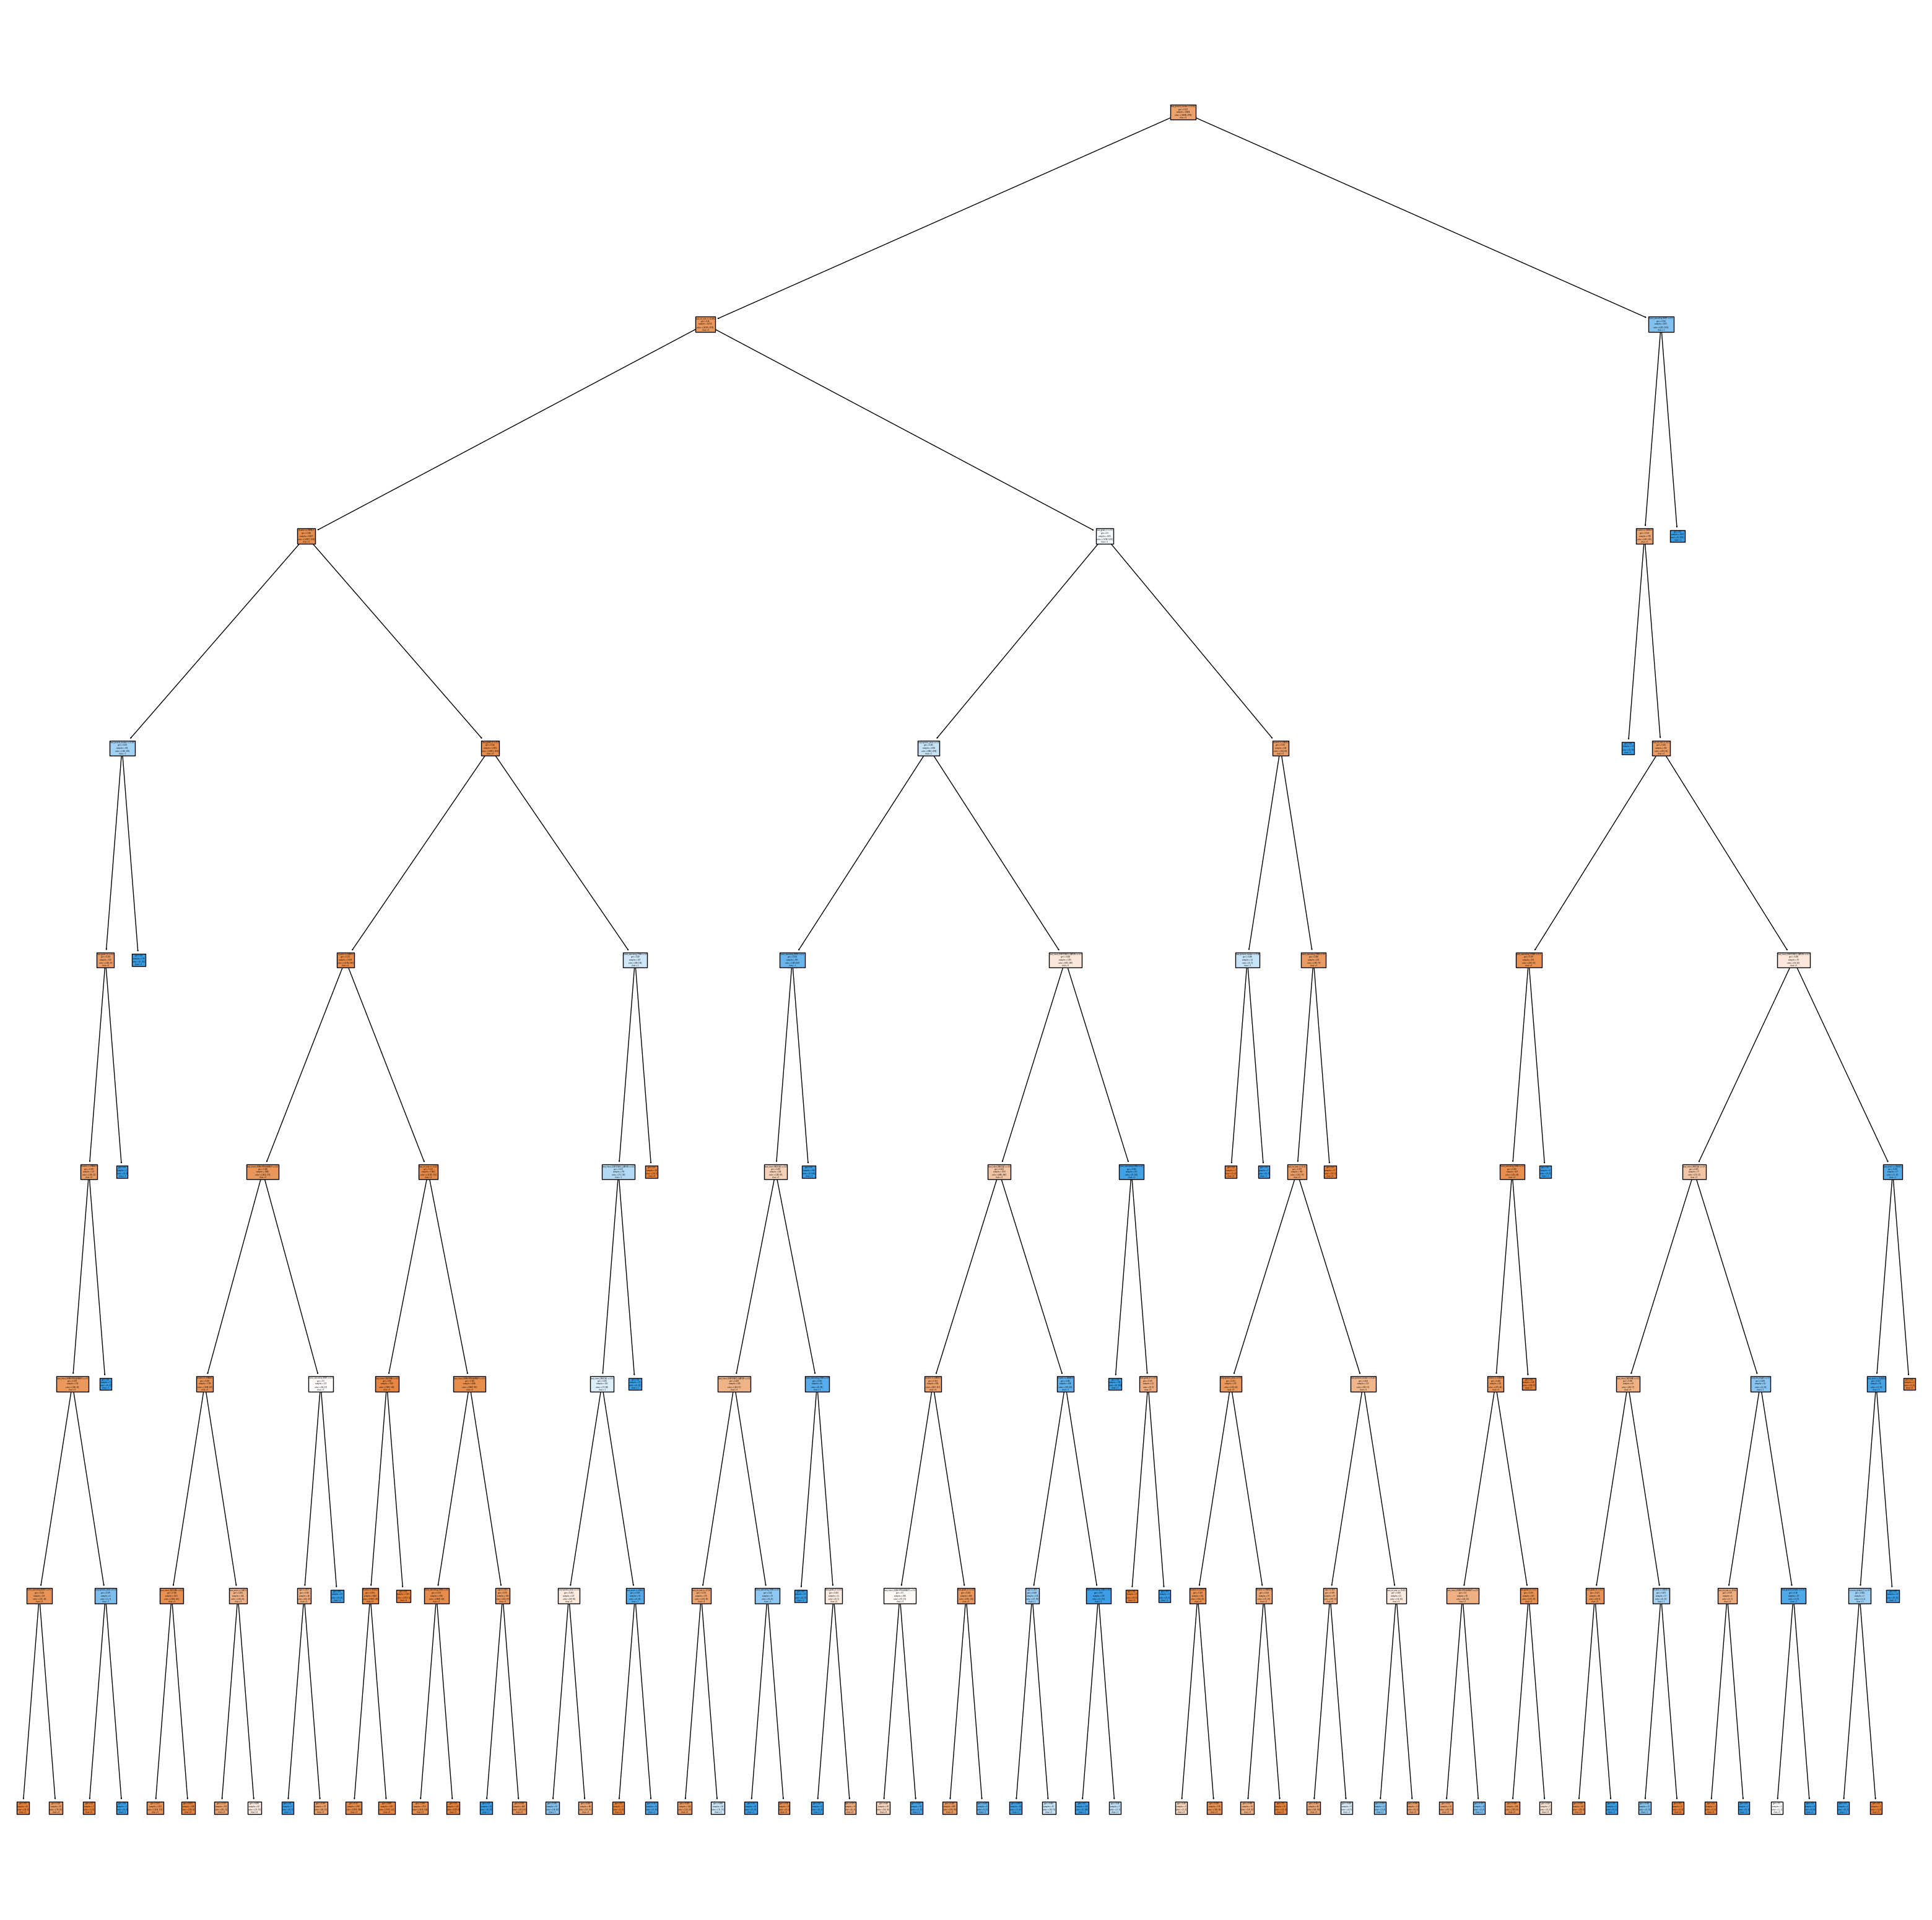

The Accuracy of Decision Tree Model on test data is 93.09%


In [77]:
final_dt_model=DecisionTreeClassifier(criterion='gini',
max_features=None,
min_samples_leaf=1,
min_samples_split=2,
max_depth=8,
random_state=100
)
final_dt_model.fit(X_train,y_train)
plt.figure(figsize=(40, 40))
tree.plot_tree(final_dt_model, feature_names=X_train.columns.tolist(),class_names=['0', '1'], filled=True)
plt.show()
dt_pred=final_dt_model.predict(X_test)
dt_acc=accuracy_score(y_test,dt_pred)*100
print("The Accuracy of Decision Tree Model on test data is {:.2f}%".format(dt_acc))

# **Ensembling Techniques**

**Bagging**

In [78]:
# @title Random Forest
#In this part we are going to implement bagging techniques by using random forest
#We also use GridSearch cv to find the best hyperparameters.
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_jobs=2)
rf_params={
'max_depth':[7,8,9,10], #This information is gained after buliding a single decision tree
'n_estimators':[100,200],
'criterion': ['gini', 'entropy', 'log_loss'],
'max_features': ['sqrt', 'log2', None],
'oob_score':[True,False] # We want to see if the metric of out-of-bag=True accuracy will have the best model
}
rf_clf_best=GridSearchCV(rf_clf,param_grid=rf_params)
rf_clf_best.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200],
                         'oob_score': [True, False]})

In [79]:
rf_clf_best.best_params_

{'criterion': 'log_loss',
 'max_depth': 10,
 'max_features': None,
 'n_estimators': 200,
 'oob_score': True}

In [209]:
#Since running the above code take a considerable amount of time, we create our new model based on that
rf_clf=RandomForestClassifier(
n_jobs=2,
criterion= 'log_loss',
max_depth=10,
max_features=None,
oob_score=True,
n_estimators=100,
)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=10, max_features=None,
                       n_jobs=2, oob_score=True)

In [229]:
# Initialize an empty list to store accuracy and precision scores
score_list = []
precision_list = []

# Loop 100 times
for i in range(100):
    # Make predictions using the Random Forest classifier
    rf_pred = rf_clf.predict(X_test)
    
    # Calculate accuracy and append to the score_list
    accuracy = accuracy_score(y_test, rf_pred) * 100
    score_list.append(accuracy)
    
    # Calculate precision and append to the precision_list
    precision = precision_score(y_test, rf_pred) * 100
    precision_list.append(precision)

# Calculate average accuracy and precision
ave_accuracy = sum(score_list) / len(score_list)
ave_precision = sum(precision_list) / len(precision_list)

# Print average accuracy and precision
print("The Accuracy of the Random Forest Model on test data is by average {:.2f}%".format(ave_accuracy))
print("The Precision of the Random Forest Model on test data is by average {:.2f}%".format(ave_precision))


The Accuracy of the Random Forest Model on test data is by average 93.13%
The Precision of the Random Forest Model on test data is by average 96.99%


The important fearures are:

age                              0.016842
income                           0.131466
employment_years                 0.036082
loan_amnt                        0.009574
loan_int_rate                    0.220162
loan_percent_income              0.226378
cred_hist_length                 0.005045
home_ownership_MORTGAGE          0.005378
home_ownership_OTHER             0.000275
home_ownership_OWN               0.027389
home_ownership_RENT              0.158709
loan_intent_DEBTCONSOLIDATION    0.031333
loan_intent_EDUCATION            0.001394
loan_intent_HOMEIMPROVEMENT      0.017651
loan_intent_MEDICAL              0.036760
loan_intent_PERSONAL             0.001773
loan_intent_VENTURE              0.015502
loan_grade_A                     0.000254
loan_grade_B                     0.001340
loan_grade_C                     0.035959
loan_grade_D                     0.016985
loan_grade_E                     0.001079
loan_grade_F                     0.000184
loan_

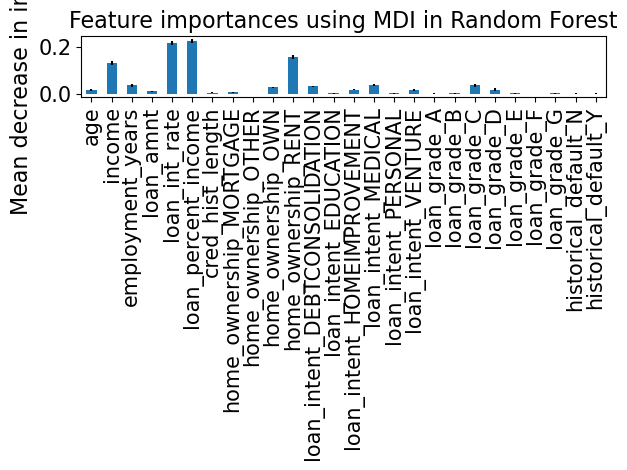

In [211]:
# @title Feature Importance by Random Forest
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI in Random Forest",fontsize=16)
ax.set_ylabel("Mean decrease in impurity",fontsize=16)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
fig.tight_layout()
print("The important fearures are:\n")
print(forest_importances)

**Boosting**

In [227]:
# @title Adaboost
from sklearn.ensemble import AdaBoostClassifier
Ada_clf=AdaBoostClassifier(
learning_rate=0.01, #This parameter is changed since smaller learning rates will decrease the difference between two sequential weak learners.
#So, it is expected to have a more accurate final model
)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(total_cleaned_df, Y1, test_size=0.2, random_state=45)
Ada_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.01)

In [85]:
Ada_pred=Ada_clf.predict(X_test)
Ada_acc=accuracy_score(y_test,Ada_pred)*100
print("The Accuracy of the AdaBoost Model on test data is {:.2f}%".format(Ada_acc))

The Accuracy of the AdaBoost Model on test data is 81.20%


The important features are:

age                              0.00
income                           0.00
employment_years                 0.00
loan_amnt                        0.00
loan_int_rate                    0.44
loan_percent_income              0.56
cred_hist_length                 0.00
home_ownership_MORTGAGE          0.00
home_ownership_OTHER             0.00
home_ownership_OWN               0.00
home_ownership_RENT              0.00
loan_intent_DEBTCONSOLIDATION    0.00
loan_intent_EDUCATION            0.00
loan_intent_HOMEIMPROVEMENT      0.00
loan_intent_MEDICAL              0.00
loan_intent_PERSONAL             0.00
loan_intent_VENTURE              0.00
loan_grade_A                     0.00
loan_grade_B                     0.00
loan_grade_C                     0.00
loan_grade_D                     0.00
loan_grade_E                     0.00
loan_grade_F                     0.00
loan_grade_G                     0.00
historical_default_N             0.00
historical_default_Y 

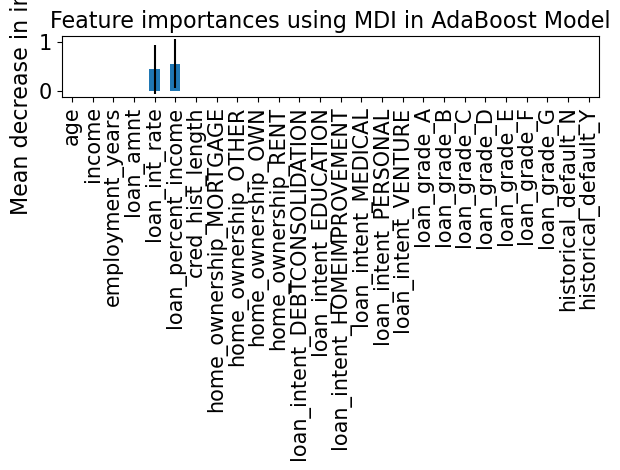

In [86]:
# @title Feature Importance by Adaboost
importances = Ada_clf.feature_importances_
sd = np.std([tree.feature_importances_ for tree in Ada_clf.estimators_], axis=0)
feature_names = X_train.columns
Ada_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
Ada_importances.plot.bar(yerr=sd, ax=ax)
ax.set_title("Feature importances using MDI in AdaBoost Model",fontsize=16)
ax.set_ylabel("Mean decrease in impurity",fontsize=16)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
fig.tight_layout()
print("The important features are:\n")
print(Ada_importances)

In [87]:
# @title Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GBoost_model=GradientBoostingClassifier()
GBoost_params={
'loss':['log_loss', 'exponential'],
'learning_rate':[0.01,0.1],
'ccp_alpha':[0,0.5,1],
'n_estimators':[200]
}
GB_search=GridSearchCV(estimator=GBoost_model,param_grid=GBoost_params)
GB_best_model=GB_search.fit(X_train,y_train)
print("The result of tuning is:")
GB_best_model.best_params_

The result of tuning is:


{'ccp_alpha': 0, 'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 200}

In [88]:
GB_pred=GB_best_model.predict(X_test)
GB_acc=accuracy_score(y_test,GB_pred)*100
print("The Accuracy of the Gradient Boost Classifier on test data is {:.2f}%".format(GB_acc))

The Accuracy of the Gradient Boost Classifier on test data is 93.33%


In [212]:
# @title Extreme Gradient Boosting
XGB_model=XGBClassifier()
XGB_params={
'eta':[0.01, 0.1,0.3],
'gamma':[0.0,0.05,0.1],
'max_depth':[6,7,8,9],
'min_child_weight':[0,1],
'lambda':[0,0.5,1],
}
XGB_search=GridSearchCV(estimator=XGB_model,param_grid=XGB_params)
XGB_best_model=XGB_search.fit(X_train,y_train)
print("The result of tuning is:")
XGB_best_model.best_params_

The result of tuning is:


{'eta': 0.1, 'gamma': 0.1, 'lambda': 1, 'max_depth': 8, 'min_child_weight': 1}

In [231]:
XGB_pred=XGB_best_model.predict(X_test)
XGB_acc=accuracy_score(y_test,XGB_pred)*100
XGB_precision = precision_score(y_test, XGB_pred) * 100
print("The Accuracy of the XGB Classifier on test data is {:.2f}%".format(XGB_acc))
print("The Precision of the Gradient Boost Classifier on test data is {:.2f}%".format(XGB_precision))

The Accuracy of the XGB Classifier on test data is 93.42%
The Precision of the Gradient Boost Classifier on test data is 96.77%


In [220]:
# @title Comparing Best times
def benchmark(clf, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print(f"train time: {train_time:.3}s")
    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print(f"test time: {test_time:.3}s")
    score = metrics.accuracy_score(y_test, pred)
    print(f"accuracy: {score:.3}")
    if hasattr(clf, "coef_"):
        print(f"dimensionality: {clf.coef_.shape[1]}")
        print(f"density: {density(clf.coef_)}")
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
#return clf_descr, score, train_time, test_time
results = []
for clf, name in (
(XGBClassifier(eta= 0.1, gamma= 0.1, max_depth= 8, min_child_weight= 1), "Extreme Gradient Boosting"),
(RandomForestClassifier(
n_jobs=2,
criterion= 'log_loss',
max_depth=10,
max_features=None,
oob_score=True,
n_estimators=100,
),"Random Forest Classifier"),
(SVC(C= 10, gamma= 0.1, kernel= 'rbf'),"Support Vector Classifier")
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

Extreme Gradient Boosting
________________________________________________________________________________
Training: 
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
train time: 0.409s
test time: 0.017s
accuracy: 0.934
Random Forest Classifier
_______________________________________________________________

In [232]:
# @title Comparing top 3 models
print("The precision of Extreme Gradient Boosting model on the test set is {:.2f} %".format(XGB_precision))
print("The Precision of SVC model on the test set is {:.2f} %".format(precision))
print("The Precision of Random Forest model on the test set is {:.2f} %".format(ave_precision))

The precision of Extreme Gradient Boosting model on the test set is 96.77 %
The Precision of SVC model on the test set is 96.99 %
The Precision of Random Forest model on the test set is 96.99 %


In [37]:
# @title Confusion Matrix for XGBoost
# Displaying the Confusion Matrix
cm_XGB = confusion_matrix(y_test, XGB_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_XGB,
                              display_labels=[0, 1])
# Disable interactive mode to prevent shaking
plt.ioff()
# Create a new figure with a specific size (you can adjust width and height as needed)
disp.plot()
# Add a title to the plot
plt.title('XGBoost Model Confusion Matrix')
# Show the plot
plt.show()


NameError: name 'y_test' is not defined